In [1]:
import pandas as pd
import matplotlib.pyplot as plt

**Завантажте дані з файлу CSV.**

In [2]:
df = pd.read_csv('/home/oleg/PycharmProjects/pandas_bot_factory/employees_records.csv', )
df.head()

,first_name,last_name,age,position,salary,work_experience
0,Daniel,Wells,35,NaN,26054,5
1,Tom,Stark,25,tech_lead,21496,5
2,Ryan,Rhodes,32,tech_lead,25049,6
3,Stephanie,Mcguire,39,junior,49876,1
4,Lisa,Rice,49,hr_manager,37586,4


**Видаліть рядки з неправильними або відсутніми даними.**

In [3]:
df = df.dropna()
df.head(20)

,first_name,last_name,age,position,salary,work_experience
1,Tom,Stark,25,tech_lead,21496,5
2,Ryan,Rhodes,32,tech_lead,25049,6
3,Stephanie,Mcguire,39,junior,49876,1
4,Lisa,Rice,49,hr_manager,37586,4
6,Eric,Bradley,44,tech_lead,21307,2
7,Justin,Garcia,55,hr_manager,11258,6
14,Laurie,Preston,26,hr_manager,35211,9
15,Jennifer,Riggs,42,team_lead,31617,5
16,Dwayne,Cook,29,junior,29811,10
18,Paula,Parker,34,hr_manager,33175,10


In [4]:
df.shape

(80, 6)

In [5]:
df['salary'] = df['salary'].apply(lambda x: -1 * x if x < 0 else x)
df.head(20)

,first_name,last_name,age,position,salary,work_experience
1,Tom,Stark,25,tech_lead,21496,5
2,Ryan,Rhodes,32,tech_lead,25049,6
3,Stephanie,Mcguire,39,junior,49876,1
4,Lisa,Rice,49,hr_manager,37586,4
6,Eric,Bradley,44,tech_lead,21307,2
7,Justin,Garcia,55,hr_manager,11258,6
14,Laurie,Preston,26,hr_manager,35211,9
15,Jennifer,Riggs,42,team_lead,31617,5
16,Dwayne,Cook,29,junior,29811,10
18,Paula,Parker,34,hr_manager,33175,10


**Виконайте декілька агрегаційних операцій, наприклад, обчисліть середню зарплату та максимальний вік працівників.**

In [6]:
df.salary.sum()

2528771

In [7]:
df.salary.mean()

31609.6375

In [8]:
df.age.mean()

35.3625

In [9]:
df.work_experience.mean()

5.9125

In [10]:
df[['position', 'salary']].groupby('position').sum()

,salary
position,
hr_manager,536020
junior,470645
middle,370073
senior,412826
team_lead,302450
tech_lead,436757


In [11]:
df[['position', 'salary']].groupby('position').mean()

,salary
position,
hr_manager,33501.250000
junior,33617.500000
middle,30839.416667
senior,37529.636364
team_lead,25204.166667
tech_lead,29117.133333


In [12]:
df[['position', 'age']].groupby('position').max()

,age
position,
hr_manager,55
junior,55
middle,53
senior,52
team_lead,52
tech_lead,50


**Створіть таблицю з півотом, використовуючи зарплату як значення, а посаду та вік як рядки та стовпці відповідно.**

In [13]:
df.pivot_table(index='position', columns='age', values='salary', aggfunc='mean')

age,20,21,22,23,24,25,26,29,30,31,...,44,45,46,48,49,50,51,52,53,55
position,,,,,,,,,,,,,,,,,,,,,
hr_manager,NaN,NaN,NaN,NaN,NaN,NaN,35211.000000,NaN,NaN,33016.0,...,NaN,30918.0,NaN,18029.0,37586.0,46431.0,16694.0,NaN,NaN,11258.0
junior,40345.0,NaN,NaN,NaN,26713.0,18314.0,24502.000000,29811.0,NaN,43216.0,...,NaN,NaN,NaN,NaN,NaN,35147.5,NaN,NaN,NaN,49076.0
middle,NaN,NaN,40546.0,43379.0,NaN,NaN,NaN,NaN,34263.0,15992.0,...,NaN,36417.0,25993.0,NaN,NaN,NaN,NaN,NaN,25674.5,NaN
senior,32478.0,46983.0,NaN,NaN,43549.0,28135.0,NaN,NaN,44021.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44310.0,NaN,NaN
team_lead,39804.0,NaN,NaN,NaN,16191.0,NaN,20795.666667,15603.0,NaN,NaN,...,NaN,NaN,14987.0,NaN,NaN,NaN,NaN,41057.0,NaN,NaN
tech_lead,NaN,30698.0,20677.0,37700.0,36507.0,21496.0,47109.000000,NaN,30149.0,NaN,...,21307.0,NaN,NaN,31240.5,NaN,41678.0,NaN,NaN,NaN,NaN


In [14]:
df.pivot_table(index='age', columns='position', values='salary', aggfunc='mean')

position,hr_manager,junior,middle,senior,team_lead,tech_lead
age,,,,,,
20,NaN,40345.0,NaN,32478.0,39804.000000,NaN
21,NaN,NaN,NaN,46983.0,NaN,30698.0
22,NaN,NaN,40546.0,NaN,NaN,20677.0
23,NaN,NaN,43379.0,NaN,NaN,37700.0
24,NaN,26713.0,NaN,43549.0,16191.000000,36507.0
25,NaN,18314.0,NaN,28135.0,NaN,21496.0
26,35211.000000,24502.0,NaN,NaN,20795.666667,47109.0
29,NaN,29811.0,NaN,NaN,15603.000000,NaN
30,NaN,NaN,34263.0,44021.0,NaN,30149.0


**Побудуйте графік, що відображає залежність зарплати від віку працівників.**

In [26]:
df_chart = df[['age', 'salary']].groupby('age').mean()

<Axes: xlabel='age'>

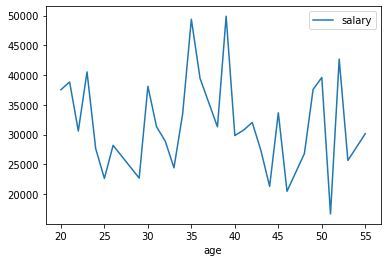

In [27]:
df_chart.plot()